- **Universidade**: Universidade de São Paulo (USP)
- **Instituto**: Instituto de Ciências Matemáticas e de Computação (ICMC)
- **Disciplina**: SME0823 - Modelos de Regressão e Aprendizado Supervisionado II
- **Discente**: Carlos Filipe de Castro Lemos
- **Docente**: Cibele Russo

## SME0823 - Modelos de Regressão e Aprendizado Supervisionado II

### Avaliação 2

#### Entrega até 1/12/2025, individual.

#### Forma de entrega:

O/a aluno/a deve fazer o upload do notebook executado em um repositório github público, indicando seu nome completo e código da disciplina, e indicar link do notebook no e-disciplinas em local que será indicado.

Um estudo clínico busca investigar fatores associados ao número de espirros diários apresentados por indivíduos com rinite alérgica no período em que as plantas mais liberam o pólen no ar. Para cada participante, foram coletadas as seguintes variáveis:

* **nsneeze**: número de espirros observados em um dia (variável resposta de contagem).
* **alcohol**: consumo de bebida alcoólica nas 24 horas anteriores (0 = não, 1 = sim).
* **antihist**: uso de anti-histamínico no dia da observação (0 = não, 1 = sim).
* **smoker**: indicador de tabagismo (0 = não fumante, 1 = fumante).
* **age**: idade do paciente (anos).
* **pollen**: índice quantitativo de concentração de pólen no ar no dia da observação.


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.

**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


**6.** Separe os dados em dois subconjuntos, treinamento com 70% das observações e
teste com 30%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (deviance, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).


**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.


Utilize os códigos abaixo para iniciar suas análises.

Atenção: Se seu número USP

- termina com 0 ou 1, utilize os dados sneeze1
- termina com 2 ou 3, utilize os dados sneeze2
- termina com 4 ou 5, utilize os dados sneeze3
- termina com 6 ou 7, utilize os dados sneeze4
- termina com 8 ou 9, utilize os dados sneeze5

## RESOLUÇÃO DA AVALIAÇÃO

### Carregamento das Bibliotecas

In [10]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import warnings
import warnings

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from statsmodels.tools.sm_exceptions import DomainWarning
from scipy import stats

### Configurações Iniciais

In [11]:
# Configurações Iniciais

# Estilo acessível para daltônicos
sns.set_palette("colorblind")
sns.set_style("whitegrid")

# Configurações globais para ignorar avisos de versão futura (limpeza visual)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning, module='pkg_resources')
warnings.filterwarnings("ignore", category=DeprecationWarning)
os.environ["PYTHONWARNINGS"] = "ignore"

### Carregamento dos Dados

In [12]:
# Como meu número USP é terminado em 0 - devo usar sneeze1.csv
print(20*'-' + ' TABELA DE DADOS ' + 20*'-')
df = pd.read_csv('sneeze1.csv').iloc[:,1:]
df

-------------------- TABELA DE DADOS --------------------


,nsneeze,alcohol,antihist,smoker,age,pollen
0,6,0,1,1,80.0,43.279066
1,5,1,0,0,46.0,61.571050
2,0,0,1,0,20.0,24.281061
3,18,0,0,1,27.0,59.588401
4,5,0,0,0,48.0,32.727172
...,...,...,...,...,...,...
1195,72,0,0,1,51.0,110.470695
1196,6,0,0,0,65.0,45.704558
1197,8,0,0,0,59.0,20.381291
1198,31,0,0,1,20.0,31.376729


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   nsneeze   1200 non-null   int64  
 1   alcohol   1200 non-null   int64  
 2   antihist  1200 non-null   int64  
 3   smoker    1200 non-null   int64  
 4   age       1200 non-null   float64
 5   pollen    1200 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 56.4 KB


Pelas descrições acima, não temos valores nulos.

In [14]:
df.columns

Index(['nsneeze', 'alcohol', 'antihist', 'smoker', 'age', 'pollen'], dtype='object')

### **1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.

#### Análise de Variáveis Numéricas


==== Mostra Distribuições ====



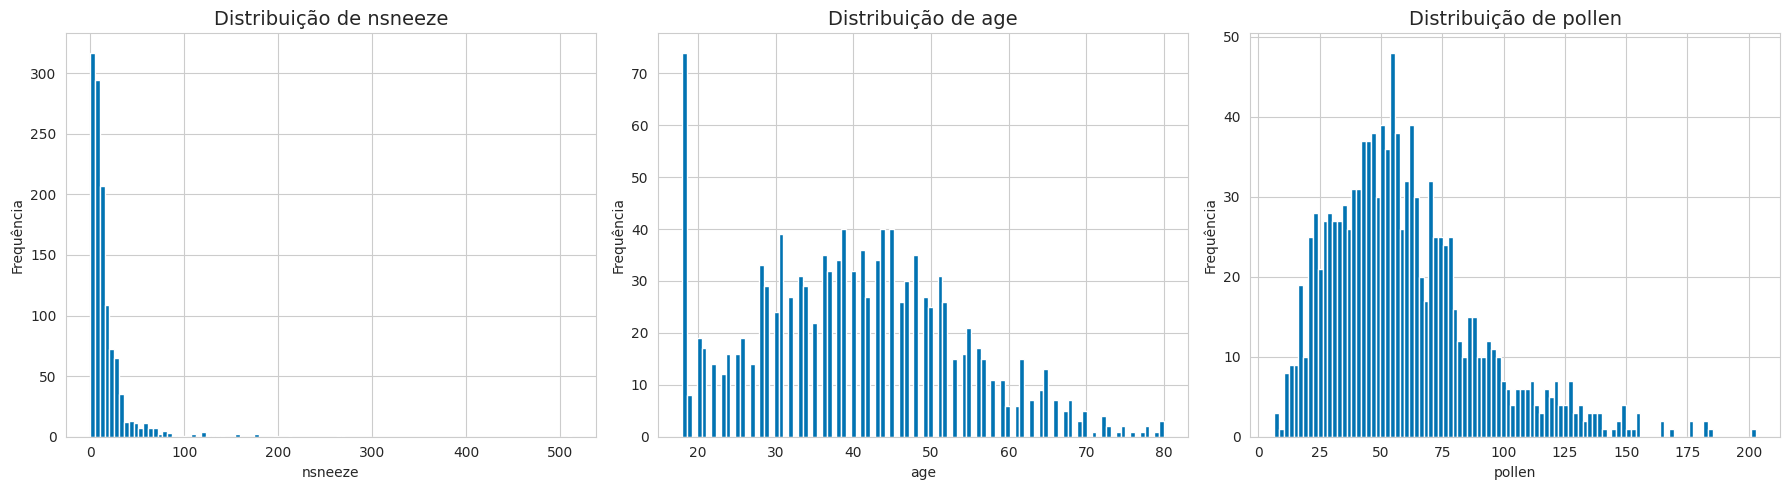


==== Estatísticas Descritivas ====

          count       mean        std        min        25%        50%  \
nsneeze  1200.0  17.093333  27.537245   0.000000   5.000000  10.000000   
age      1200.0  40.342500  13.324469  18.000000  31.000000  40.000000   
pollen   1200.0  59.566507  30.430699   6.576282  38.017155  54.753465   

               75%        max  
nsneeze  19.000000  512.00000  
age      49.000000   80.00000  
pollen   74.416409  202.92269  

==== Assimetria (Skewness) ====

nsneeze    7.948605
age        0.283271
pollen     1.081949
dtype: float64

==== Curtose (Kurtosis) ====

nsneeze    105.130237
age         -0.334498
pollen       1.570307
dtype: float64


In [15]:
numericas = ['nsneeze', 'age', 'pollen']
desc = df[numericas].describe().T

print("\n==== Mostra Distribuições ====\n")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, col in zip(axes, numericas):
    ax.hist(df[col], bins=100)
    ax.set_title(f"Distribuição de {col}", fontsize=14)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequência")
plt.tight_layout()
plt.show()

print("\n==== Estatísticas Descritivas ====\n")
print(desc)

print("\n==== Assimetria (Skewness) ====\n")
print(df[numericas].skew())

print("\n==== Curtose (Kurtosis) ====\n")
print(df[numericas].kurtosis())

Conforme dados acima, temos os seguintes cenários:

- **_nsneeze_**: A distribuição é fortemente assimétrica à direita (skewness de 7.95), com a grande maioria dos dados concentrada nos valores baixos (mediana de 10 e 75% dos casos abaixo de 19). No entanto, observam-se valores extremos (outliers) chegando a 512. A média (17.1) é puxada para cima em razão desses extremos, descolando-se da mediana. A curtose é extremamente alta (105.1), indicando uma cauda muito pesada e a presença de eventos raros de espirros excessivos. Isso sugere que o evento "espirrar muito" não é apenas um desvio padrão, é um comportamento anômalo específico de um subgrupo (por exemplo, alérgicos severos).

- **_age_**: A barra referente aos 18 anos é desproporcionalmente alta (visível no histograma), o que pode indicar viés de coleta de dados (como recrutamento em universidades). Tirando esse pico inicial, a distribuição se comporta de forma relativamente uniforme/achatada (curtose negativa de -0.33) entre as faixas etárias, decaindo levemente. A média é de 40.3 anos, praticamente idêntica à mediana (40.0), refletindo a baixa assimetria (0.28). A variabilidade é moderada, com um desvio padrão de 13.3.

- **_pollen_**: A distribuição de pólen é assimétrica à direita (skewness de 1.08), concentrada principalmente entre 38 e 75 unidades (intervalo interquartil), mas com valores máximos chegando a 202.9. A média (59.6) situa-se acima da mediana (54.8), confirmando a cauda longa visível à direita no gráfico. A curtose de 1.57 sugere uma variabilidade maior que a da distribuição normal e caudas mais pesadas, mas sem os extremos severos observados na variável nsneeze.

Essas informações podem ser confirmadas pelos gráficos e tabelas estatísticas acima.

#### Análise das Variáveis Numéricas Binárias

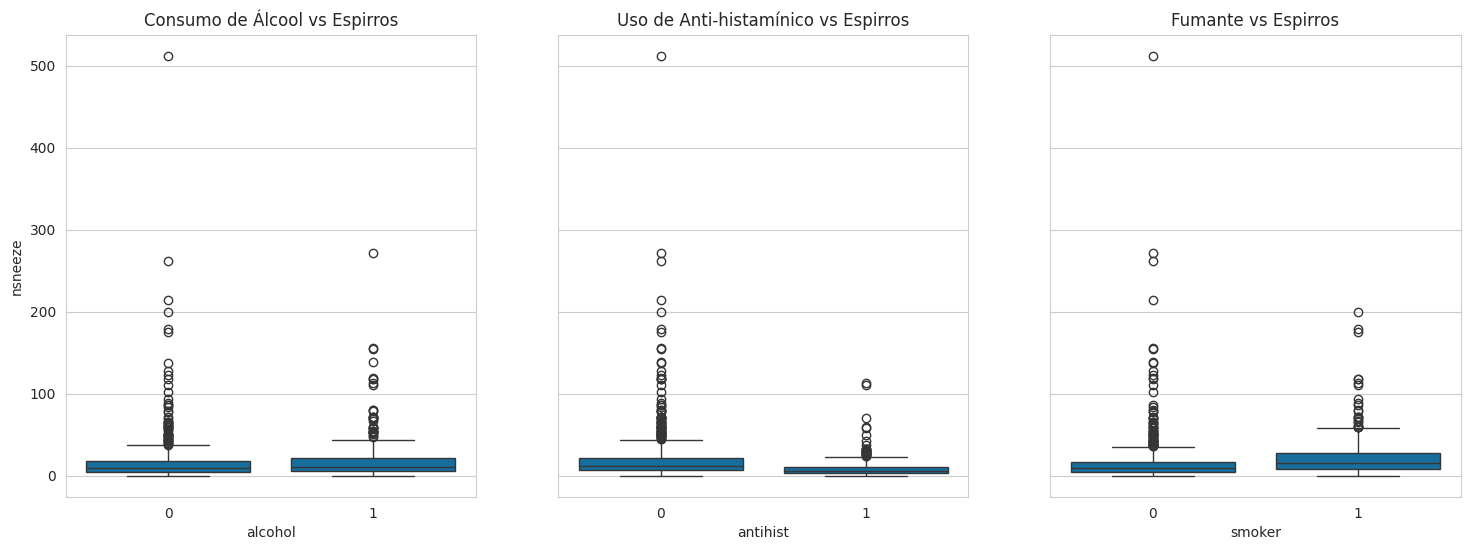

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Álcool vs Espirros
sns.boxplot(ax=axes[0], x='alcohol', y='nsneeze', data=df)
axes[0].set_title('Consumo de Álcool vs Espirros')

# Anti-histamínico vs Espirros
sns.boxplot(ax=axes[1], x='antihist', y='nsneeze', data=df)
axes[1].set_title('Uso de Anti-histamínico vs Espirros')

# Fumante vs Espirros
sns.boxplot(ax=axes[2], x='smoker', y='nsneeze', data=df)
axes[2].set_title('Fumante vs Espirros')

plt.show()

A Análise Exploratória Bivariada, conduzida através dos boxplots acima, revela informações valiosas sobre os impactos distintos das variáveis categóricas na frequência de espirros (`nsneeze`):

- **antihist**: apresentou o impacto visual mais contundente e redutor. O grupo submetido à medicação (1) demonstrou mediana e dispersão drasticamente menores em relação aos que não tomaram o remédio. Notavelmente, o uso de anti-histamínicos parece "achatar" a distribuição, eliminando quase todos os grandes *outliers* (acima de 120) e indicando alta eficácia no controle, tanto do nível basal quanto das crises agudas.

- **alcohol** e **smoker**: as variáveis de hábito mostram comportamentos diferentes entre si:

  - **smoker** (tabagismo): o grupo de fumantes (1) apresenta uma mediana visualmente superior e uma caixa (intervalo interquartil) deslocada para cima em comparação aos não fumantes. Isso indica que o tabagismo está associado a um patamar basal de espirros mais elevado.

  - **alcohol** (álcool): diferente do que se poderia supor, a ingestão de álcool não mostrou impacto visual drástico na mediana (que permanece similar ao grupo 0). Sobre extremos, podemos dizer que o caso mais severo e anômalo do dataset (o *outlier* acima de 500) encontra-se, na verdade, no grupo que não consumiu álcool (0) e não fuma. Portanto, isoladamente, o álcool não parece ser o gatilho para os eventos de "super espirros" neste conjunto de dados.

#### Análise de Correlação entre Variáveis

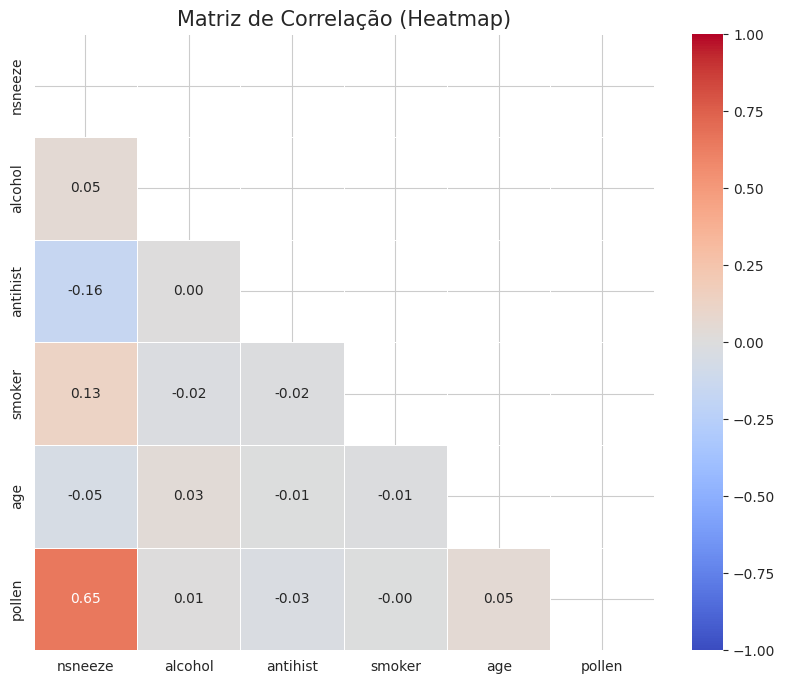

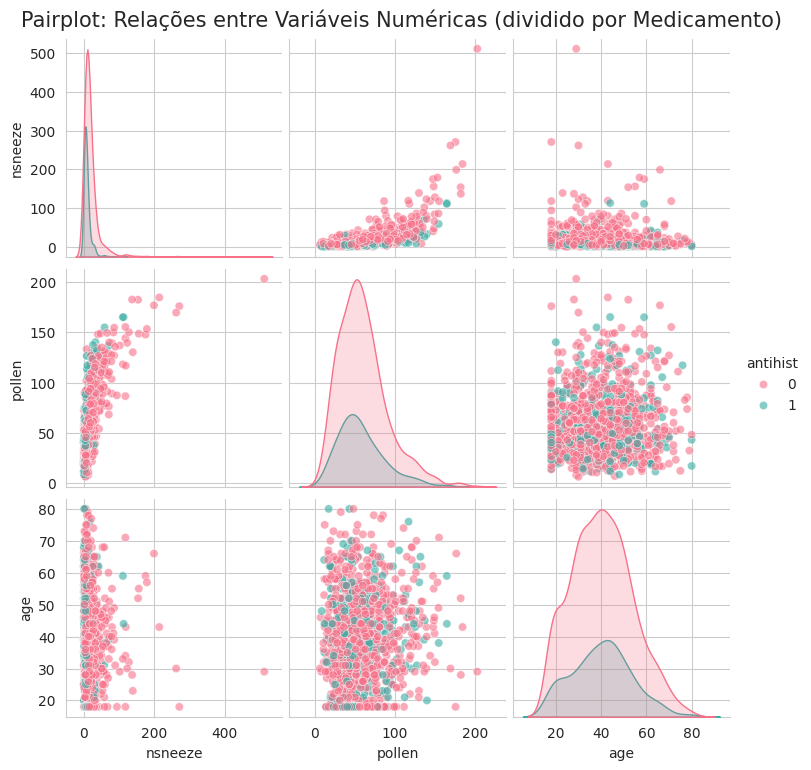

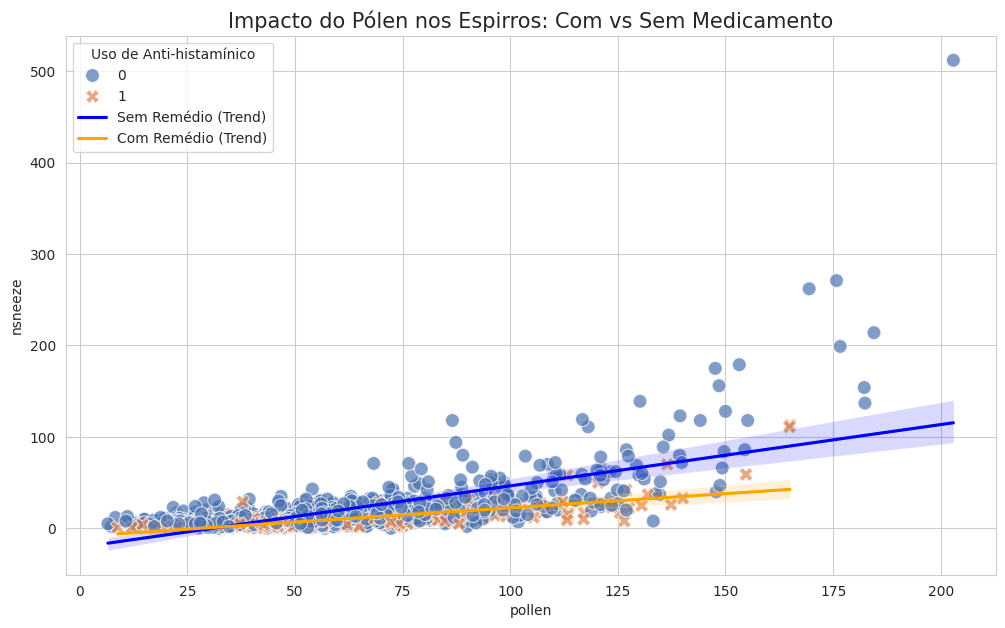

In [17]:
# ----------- Heatmap -----------
plt.figure(figsize=(10, 8))

# Calculando a correlação
corr = df.corr()

# Máscara para esconder a metade superior
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5)
plt.title('Matriz de Correlação (Heatmap)', fontsize=15)
plt.show()

# ----------- Pairplot -----------
# Vamos usar 'antihist' como cor (hue) para ver como o remédio separa os grupos em todas as variáveis
sns.pairplot(df, vars=['nsneeze', 'pollen', 'age'], hue='antihist', palette='husl', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot: Relações entre Variáveis Numéricas (dividido por Medicamento)', y=1.02, fontsize=15)
plt.show()

# ----------- Scatter Plot Detalhado ----------- 
plt.figure(figsize=(12, 7))
sns.scatterplot(x='pollen', y='nsneeze', data=df, hue='antihist', style='antihist', s=100, palette='deep', alpha=0.7)

# Adicionando retas de tendência para cada grupo para facilitar a leitura
sns.regplot(x='pollen', y='nsneeze', data=df[df['antihist']==0], scatter=False, color='blue', label='Sem Remédio (Trend)')
sns.regplot(x='pollen', y='nsneeze', data=df[df['antihist']==1], scatter=False, color='orange', label='Com Remédio (Trend)')

plt.title('Impacto do Pólen nos Espirros: Com vs Sem Medicamento', fontsize=15)
plt.legend(title='Uso de Anti-histamínico')
plt.show()


A investigação dos dados aponta que a variável `pollen` (nível de pólen) é o fator determinante primário para a ocorrência de espirros (`nsneeze`), apresentando uma forte correlação positiva de Pearson ($\rho = 0.65$).

No entanto, o número de espirros parece ser fortemente moderado por fatores comportamentais e medicamentosos:

- **Proteção Medicamentosa**: a análise visual da regressão demonstra que o uso de anti-histamínicos (`antihist`) altera a resposta ao pólen. Enquanto o grupo não medicado (linha azul) apresenta um crescimento linear acentuado nos sintomas conforme o pólen aumenta (com alta dispersão e casos extremos acima de 500 espirros), o grupo medicado (linha laranja) demonstra uma curva de resposta significativamente amortecida e com menor variabilidade.

- **Fatores Agravantes**: a matriz de correlação indica que o tabagismo (`smoker`) atua como o principal agravante secundário, com uma correlação positiva leve ($\rho = 0.13$). Já o consumo de álcool (`alcohol`), contrariando a hipótese inicial, apresentou uma correlação linear praticamente nula ($\rho = 0.05$) com a frequência de espirros, sugerindo que não é um preditor linear relevante para a intensidade dos sintomas neste conjunto de dados.

### **2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis **alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações. Apresente e interprete: a estimativa dos coeficientes e sua significância estatística.


In [18]:
# Fórmula sugerida pelo exercício
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

# Possibilidades de links
links_para_testar = {
    "Log (Padrão)": sm.families.links.Log(),
    "Identidade": sm.families.links.Identity(),
    "Raiz Quadrada": sm.families.links.Sqrt()
}

# Modelos ajustados
modelos_ajustados = {}

print("=== Iniciando Ajuste dos Modelos ===\n")
for nome_link, link_obj in links_para_testar.items():

    # Elimina warnings desnecessários
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=DomainWarning)
        warnings.filterwarnings("ignore", category=RuntimeWarning)
        
        try:

            # Configuração do modelo
            modelo = smf.glm(
                formula=formula, 
                data=df, 
                family=sm.families.Poisson(link=link_obj)
            )
            
            # Treinamento do Modelo
            resultado = modelo.fit()
            
            # Verifica se o AIC é válido
            if np.isnan(resultado.aic):
                raise ValueError("AIC resultou em NaN (Modelo inadequado)")
            
            modelos_ajustados[nome_link] = resultado
            print(f"✅ Modelo '{nome_link}' ajustado. AIC: {resultado.aic:.2f}")
            
        except Exception as e:
            print(f"⚠️ Modelo '{nome_link}' descartado. Motivo: Incompatibilidade matemática ({e})")

# Seleção do melhor modelo
if modelos_ajustados:
    melhor_modelo_nome = min(modelos_ajustados, key=lambda k: modelos_ajustados[k].aic)
    melhor_ajuste = modelos_ajustados[melhor_modelo_nome]

    print(f"\n🏆 O modelo vencedor é: {melhor_modelo_nome.upper()}")
    print("-" * 60)
    print(melhor_ajuste.summary())
else:
    print("Nenhum modelo convergiu.")

=== Iniciando Ajuste dos Modelos ===

✅ Modelo 'Log (Padrão)' ajustado. AIC: 9906.28
⚠️ Modelo 'Identidade' descartado. Motivo: Incompatibilidade matemática (AIC resultou em NaN (Modelo inadequado))
✅ Modelo 'Raiz Quadrada' ajustado. AIC: 11784.95

🏆 O modelo vencedor é: LOG (PADRÃO)
------------------------------------------------------------
                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1200
Model:                            GLM   Df Residuals:                     1194
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4947.1
Date:                ter, 25 nov 2025   Deviance:                       4949.1
Time:                        11:02:36   Pearson chi2:                 5.04e+03
No. Iterations:       

Para selecionar o melhor modelo, utilizamos o **Critério de Informação de Akaike (AIC)** como métrica principal de comparação entre modelos com diferentes funções de ligação. Esse critério foi escolhido porque estima a qualidade relativa do modelo, penalizando a complexidade e recompensando a aderência aos dados (*likelihood*). Assim, **quanto menor o AIC, melhor o modelo**.

Analisando-se os resultados do ajuste, temos o seguinte:

- **Identidade (AIC NaN)**: o modelo falhou na convergência matemática, resultando em incompatibilidade, e foi descartado dos resultados finais.
  
- **Raiz Quadrada (AIC 11784.95)**: apresentou desempenho inferior à função de ligação logarítmica, com um valor de AIC significativamente mais alto.
  
- **LOG (AIC 9906.28)**: apresentou o menor valor AIC entre os modelos convergentes. Isso confirma estatisticamente que a função de ligação Log é a que melhor se ajusta aos dados, indicando que a relação entre as variáveis explicativas e a taxa de espirros segue uma dinâmica multiplicativa.

A interpretação dos coeficientes pode ser obtida da seguinte forma:

In [19]:
print("=== INTERPRETAÇÃO AUTOMÁTICA DOS COEFICIENTES ===\n")

# Acessando os dados diretamente do objeto do modelo ajustado
params = melhor_ajuste.params
pvalues = melhor_ajuste.pvalues
conf_int = melhor_ajuste.conf_int()
conf_int.columns = ['Lower', 'Upper']

# Iterando sobre cada variável
for var_name, coef in params.items():
    
    # Transformação Matemática (Log -> Razão de Taxas)
    rate_ratio = np.exp(coef)
    pct_change = (rate_ratio - 1) * 100
    
    # Verificação de Significância
    p_val = pvalues[var_name]
    sig_text = "Sim (p<0.05)" if p_val < 0.05 else f"Não (p={p_val:.3f})"
    sig_marker = "✅" if p_val < 0.05 else "❌"
    
    # Limpeza do Nome da Variável (Estética)
    clean_name = var_name.replace("C(", "").replace(")[T.1]", "").replace("Intercept", "Intercepto (Valor Base)")
    
    # Lógica de Texto (Aumento ou Redução?)
    if var_name == 'Intercept':
        direction = "Valor de Referência"
        explanation = f"Log-count base: {coef:.2f}"
    else:
        if pct_change > 0:
            direction = "AUMENTO"
            desc = f"aumenta a contagem esperada de espirros em {abs(pct_change):.2f}%"
        else:
            direction = "REDUÇÃO"
            desc = f"reduz a contagem esperada de espirros em {abs(pct_change):.2f}%"
            
        explanation = f"Cada unidade desta variável \n\t{desc}."

    # --- IMPRESSÃO FORMATADA ---
    print(f"🔹 VARIÁVEL: {clean_name.upper()}")
    print(f"   Coeficiente (Log): {coef:.4f}")
    print(f"   Razão de Taxas (RR): {rate_ratio:.4f}")
    print(f"   Significância Estatística: {sig_marker} {sig_text}")
    print(f"   INTERPRETAÇÃO: {explanation}")
    print("-" * 60)

=== INTERPRETAÇÃO AUTOMÁTICA DOS COEFICIENTES ===

🔹 VARIÁVEL: INTERCEPTO (VALOR BASE)
   Coeficiente (Log): 1.5560
   Razão de Taxas (RR): 4.7398
   Significância Estatística: ✅ Sim (p<0.05)
   INTERPRETAÇÃO: Log-count base: 1.56
------------------------------------------------------------
🔹 VARIÁVEL: ALCOHOL
   Coeficiente (Log): 0.2191
   Razão de Taxas (RR): 1.2449
   Significância Estatística: ✅ Sim (p<0.05)
   INTERPRETAÇÃO: Cada unidade desta variável 
	aumenta a contagem esperada de espirros em 24.49%.
------------------------------------------------------------
🔹 VARIÁVEL: ANTIHIST
   Coeficiente (Log): -0.6449
   Razão de Taxas (RR): 0.5247
   Significância Estatística: ✅ Sim (p<0.05)
   INTERPRETAÇÃO: Cada unidade desta variável 
	reduz a contagem esperada de espirros em 47.53%.
------------------------------------------------------------
🔹 VARIÁVEL: SMOKER
   Coeficiente (Log): 0.4639
   Razão de Taxas (RR): 1.5903
   Significância Estatística: ✅ Sim (p<0.05)
   INTERPRETAÇ

### **3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes. Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.

In [20]:
# MÉTODO 1: Deviance
deviance = melhor_ajuste.deviance
df_resid = melhor_ajuste.df_resid
disp_deviance = deviance / df_resid

# MÉTODO 2: Pearson Chi²
pearson_chi2 = np.sum(((df["nsneeze"] - melhor_ajuste.mu)**2) / melhor_ajuste.mu)
disp_pearson = pearson_chi2 / df_resid

# MÉTODO 3: Var(Y) / E(Y) 
media = df["nsneeze"].mean()
variancia = df["nsneeze"].var()
ratio_var_mean = variancia / media

# --- RESUMO COMPARATIVO 
print("\n===== Diagnóstico de Superdispersão =====\n")
print(f"1) Deviance / GL = {disp_deviance:.3f}")
print(f"   (≈1 adequado; >1.5 indica superdispersão)\n")
print(f"2) Pearson Chi² / GL = {disp_pearson:.3f}")
print(f"   (≈1 adequado; >1.5 indica superdispersão)\n")
print(f"3) Var(Y) / Média(Y) = {ratio_var_mean:.3f}")
print(f"   (≈1 adequado; >>1 indica superdispersão)\n")

# --- Conclusão automática -----------------------------------------------------
print("===== Conclusão Automática =====\n")
indicadores = {
    "Deviance/GL": disp_deviance,
    "Pearson/GL": disp_pearson,
    "Var/Mean": ratio_var_mean
}
# regras simples para decisão
flags_super = sum([
    disp_deviance > 1.5,
    disp_pearson > 1.5,
    ratio_var_mean > 1.5
])
if flags_super >= 2:
    print("❌ Há forte evidência de SUPERDISPERSÃO. O modelo de Poisson NÃO é adequado.")
    print("   Alternativas: Quasi-Poisson ou Negative Binomial.")
elif flags_super == 1:
    print("⚠️ Há indício moderado de superdispersão. Avaliar modelos alternativos.")
else:
    print("✔️ Não há evidência de superdispersão. O modelo de Poisson parece adequado.")



===== Diagnóstico de Superdispersão =====

1) Deviance / GL = 4.145
   (≈1 adequado; >1.5 indica superdispersão)

2) Pearson Chi² / GL = 4.218
   (≈1 adequado; >1.5 indica superdispersão)

3) Var(Y) / Média(Y) = 44.362
   (≈1 adequado; >>1 indica superdispersão)

===== Conclusão Automática =====

❌ Há forte evidência de SUPERDISPERSÃO. O modelo de Poisson NÃO é adequado.
   Alternativas: Quasi-Poisson ou Negative Binomial.


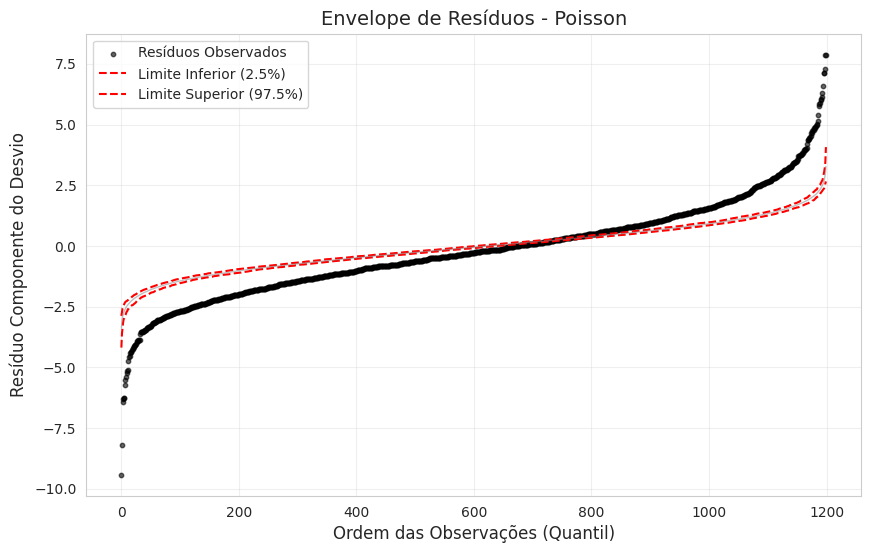

In [21]:
def envelope_poisson(fitted_model, title="Envelope de Resíduos - Poisson"):
    # Extraímos X e y diretamente do modelo ajustado para evitar erros
    X = fitted_model.model.exog
    
    # Resíduos deviance do modelo original
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)
    n = len(resid_dev)
    sim_resid = []
    
    # Simulação (Monte Carlo)
    # Fazemos 100 simulações para criar as bandas de confiança
    for _ in range(100):
        # Gera valores ajustados (mu) garantindo que sejam positivos
        mu_sim = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
        
        # Gera uma nova variável resposta (y) baseada na distribuição Poisson
        y_sim = np.random.poisson(mu_sim)
        
        # Ajusta o modelo simulado usando os mesmos X
        sim_model = sm.GLM(
            y_sim, 
            X, 
            family=sm.families.Poisson(link=sm.families.links.Log())
        ).fit()
        
        # Guarda os resíduos ordenados dessa simulação
        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    
    # Cálculo dos percentis (Intervalo de Confiança de 95%)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)
    mean_sim = np.mean(sim_resid, axis=0) # Média das simulações (opcional, para referência)

    # Plotagem
    plt.figure(figsize=(10, 6))
    
    # Pontos dos resíduos observados
    plt.scatter(range(n), sorted_resid, color='black', alpha=0.6, s=10, label="Resíduos Observados")
    
    # Bandas de confiança
    plt.plot(lower, color='red', linestyle='--', linewidth=1.5, label="Limite Inferior (2.5%)")
    plt.plot(upper, color='red', linestyle='--', linewidth=1.5, label="Limite Superior (97.5%)")
    
    # Linha média (ajuda a ver a tendência central esperada)
    plt.plot(mean_sim, color='gray', linestyle='-', linewidth=1, alpha=0.5)

    plt.title(title, fontsize=14)
    plt.xlabel("Ordem das Observações (Quantil)", fontsize=12)
    plt.ylabel("Resíduo Componente do Desvio", fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# --- EXECUÇÃO ---
envelope_poisson(melhor_ajuste)

A análise de diagnóstico por envelopes simulados corrobora as evidências estatísticas de inadequação do modelo. O gráfico exibe uma violação sistemática e severa dos limites de confiança (95%), com os resíduos observados (pontos azuis) ultrapassando largamente as fronteiras do envelope teórico (linhas vermelhas), atingindo valores extremos próximos a -10 na cauda inferior e +8 na superior.

Esse comportamento visual confirma a presença de forte **sobredispersão**, ratificada quantitativamente pelas métricas de ajuste: a razão da *Deviance* pelos graus de liberdade é de **4.145** e a do *Qui-quadrado de Pearson* é de **4.218**, ambas muito acima do limiar de referência (≈1.0). Adicionalmente, a razão entre variância e média dos dados brutos atingiu **44.36**, invalidando completamente a premissa de equidispersão (média = variância).

Portanto, conclui-se que o modelo de Poisson subestima a variabilidade real dos dados e não é adequado, sendo recomendada a utilização de abordagens alternativas como Quasi-Poisson ou Binomial Negativa.

### **4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de: desvio (deviance), AIC, gráficos de resíduos componentes do desvio. Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.

In [22]:
# Configuração inicial
pd.options.display.float_format = '{:.2f}'.format
alpha_fixado = 0.23

In [23]:
print("=== 1. RECUPERANDO MODELO POISSON (JÁ CALCULADO) ===")
# AQUI ESTÁ A CORREÇÃO: Usamos a variável que já existe na memória
try:
    modelo_pois = melhor_ajuste
    print("✅ Modelo Poisson recuperado com sucesso da variável 'melhor_ajuste'.")
except NameError:
    print("❌ Erro: A variável 'melhor_ajuste' não foi encontrada. Rode o passo anterior.")

=== 1. RECUPERANDO MODELO POISSON (JÁ CALCULADO) ===
✅ Modelo Poisson recuperado com sucesso da variável 'melhor_ajuste'.


In [24]:
print(f"\n=== 2. AJUSTANDO MODELO BINOMIAL NEGATIVA (ALPHA={alpha_fixado}) ===")
# Calculamos apenas o novo modelo necessário
modelo_nb = smf.glm(
    formula=formula, 
    data=df, 
    family=sm.families.NegativeBinomial(alpha=alpha_fixado)
).fit()
print(modelo_nb.summary())


=== 2. AJUSTANDO MODELO BINOMIAL NEGATIVA (ALPHA=0.23) ===
                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1200
Model:                            GLM   Df Residuals:                     1194
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3849.6
Date:                ter, 25 nov 2025   Deviance:                       1180.2
Time:                        11:02:37   Pearson chi2:                 1.13e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9259
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------

In [25]:
print("\n=============================================================")
print("   COMPARAÇÃO FINAL: POISSON vs BINOMIAL NEGATIVA")
print("=============================================================")

comparacao = pd.DataFrame({
    'Métrica': ['AIC', 'Deviance', 'Log-Likelihood', 'Graus de Liberdade'],
    'Poisson (Recuperado)': [
        modelo_pois.aic, 
        modelo_pois.deviance, 
        modelo_pois.llf,
        modelo_pois.df_resid
    ],
    'Binomial Neg. (Novo)': [
        modelo_nb.aic, 
        modelo_nb.deviance, 
        modelo_nb.llf,
        modelo_nb.df_resid
    ]
})

print(comparacao.set_index('Métrica'))
print("\n-------------------------------------------------------------")


   COMPARAÇÃO FINAL: POISSON vs BINOMIAL NEGATIVA
                    Poisson (Recuperado)  Binomial Neg. (Novo)
Métrica                                                       
AIC                              9906.28               7711.28
Deviance                         4949.11               1180.21
Log-Likelihood                  -4947.14              -3849.64
Graus de Liberdade               1194.00               1194.00

-------------------------------------------------------------


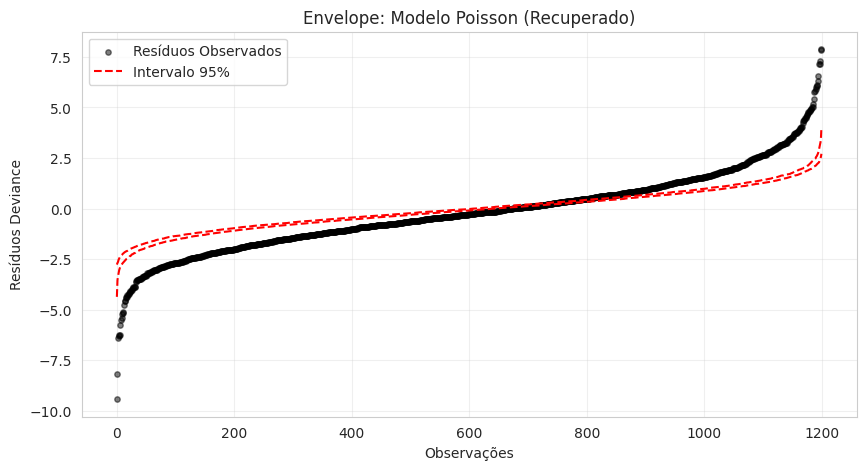

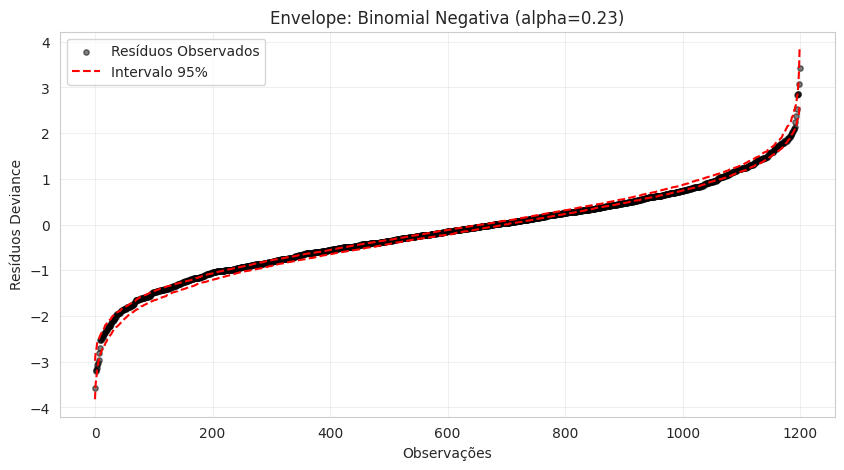

In [26]:
def envelope_diagnostico(modelo, titulo):
    X = modelo.model.exog
    mu = modelo.fittedvalues
    resid_obs = modelo.resid_deviance
    sorted_resid = np.sort(resid_obs)
    n = len(resid_obs)
    
    # Detecta a família
    familia = modelo.family.__class__.__name__
    sim_resid = []
    
    for _ in range(100):
        if 'Poisson' in familia:
            y_sim = np.random.poisson(mu)
            mod_sim = sm.GLM(y_sim, X, family=sm.families.Poisson()).fit()
            
        elif 'NegativeBinomial' in familia:
            alpha = modelo.family.alpha
            r = 1.0 / alpha
            p = r / (r + mu)
            y_sim = np.random.negative_binomial(r, p)
            mod_sim = sm.GLM(y_sim, X, family=sm.families.NegativeBinomial(alpha=alpha)).fit()
            
        sim_resid.append(np.sort(mod_sim.resid_deviance))
    
    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)
    
    # Plota gráfico
    plt.figure(figsize=(10, 5))
    plt.scatter(range(n), sorted_resid, color='black', alpha=0.5, s=15, label='Resíduos Observados')
    plt.plot(lower, 'r--', linewidth=1.5, label='Intervalo 95%')
    plt.plot(upper, 'r--', linewidth=1.5)
    plt.title(titulo)
    plt.ylabel('Resíduos Deviance')
    plt.xlabel('Observações')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Gerar os gráficos usando as variáveis corretas
envelope_diagnostico(modelo_pois, "Envelope: Modelo Poisson (Recuperado)")
envelope_diagnostico(modelo_nb, f"Envelope: Binomial Negativa (alpha={alpha_fixado})")

Os resultados acima apontam decisivamente para a **superioridade do modelo Binomial Negativo**:

- **Métricas**: o AIC apresenta menor valor (7711), assim como o Deviance (1180), indicando um melhor ajuste e correção da superdispersão que é uma falha crítica no modelo Poisson.

- **Visual**: os gráficos de envelope confirmam o melhor ajuste da Binomial Negativa, com resíduos contidos no intervalo de confiança de 95%, enquanto que o gráfico da Poisson apresentou desvios sistemáticos.

Assim, a Binomial Negativa é o modelo mais adequado, garantindo erros padrão mais confiáveis para a inferência dos coeficientes.

### **5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**: do consumo de álcool (**alcohol**) sobre o número médio de espirros e do uso de anti-histamínico (**antihist**).

In [27]:
# Calculos dos Efeitos Marginais Médios
# at='overall': calcula para cada observação e tira a média (AME)
# dummy=True: trata variáveis binárias como mudança discreta (0 -> 1)
efeitos_marginais = modelo_nb.get_margeff(at='overall', dummy=True)
print("=== Efeitos Marginais Médios (Binomial Negativa) ===")
print(efeitos_marginais.summary())

=== Efeitos Marginais Médios (Binomial Negativa) ===
         GLM Marginal Effects        
Dep. Variable:                nsneeze
Method:                          dydx
At:                           overall
                      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
C(alcohol)[T.1]      3.7788      0.669      5.649      0.000       2.468       5.090
C(antihist)[T.1]    -9.3827      0.521    -18.018      0.000     -10.403      -8.362
C(smoker)[T.1]       9.6788      0.957     10.118      0.000       7.804      11.554
age                 -0.1854      0.022     -8.380      0.000      -0.229      -0.142
pollen               0.3845      0.016     24.467      0.000       0.354       0.415


Em primeiro lugar, importante destacar que, diferente dos coeficientes do modelo ($\beta$), que indicam mudança percentual, os efeitos marginais (`dy/dx`) requisitados nesse tópico nos dão a mudança **absoluta** na contagem esperada de espirros. Assim, com base no modelo Binomial Negativo e na sua correspondente tabela de **Efeitos Marginais Médios** (*Average Marginal Effects - AME*), aqui está a interpretação dos resultados:

- **Consumo de Álcool (`alcohol` - 3.78)**: o consumo de álcool está associado a um aumento absoluto no número de espirros. Em média, mantendo todas as outras variáveis constantes, um indivíduo que consome álcool tende a ter aproximadamente **3.8 espirros a mais** do que um indivíduo que não consome. Além disso, é conveniente destacar que o valor é estatisticamente significativo ($p < 0.001$), confirmando que o álcool é um fator agravante e relevante.

- **Uso de Anti-histamínico (`antihist` - -9.38)**: o uso de anti-histamínico apresenta um forte efeito protetor em termos absolutos. Em média, o uso do medicamento resulta em uma **redução de cerca de 9.4 espirros** por observação em comparação ao não uso. Além disso, o valor é estatísticamente relevante ($z = -18.018$, $p < 0.001$).

### **6.** Separe os dados em dois subconjuntos, treinamento com 80% das observações e teste com 20%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo: o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros e o Erro Absoluto Médio (EAM). Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta: qual deles apresenta melhor desempenho preditivo fora da amostra e em que medida as conclusões baseadas em critérios de ajuste (desvio, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).

=== RANKING FINAL DOS MODELOS (POR MSE) ===
                    Modelo    MSE   MAE     AIC      BIC
0  Negative Binomial (GLM) 250.47  6.99 6140.00 -5625.68
1            Poisson (GLM) 260.05  7.02 7811.43 -2699.83
2         GradientBoosting 510.70  7.91     NaN      NaN
3             RandomForest 561.92  8.16     NaN      NaN
4                      KNN 628.18  8.19     NaN      NaN
5             DecisionTree 716.39  8.80     NaN      NaN
6                    Lasso 899.02 10.79     NaN      NaN
7                    Ridge 899.10 10.79     NaN      NaN
8                      SVR 943.09  8.38     NaN      NaN

=== MELHOR MODELO ===
Modelo    Negative Binomial (GLM)
MSE                        250.47
MAE                          6.99
AIC                       6140.00
BIC                      -5625.68
Name: 0, dtype: object

=== MELHOR MODELO ENTRE OS GLMs ===
Modelo    Negative Binomial (GLM)
MSE                        250.47
MAE                          6.99
AIC                       6140.

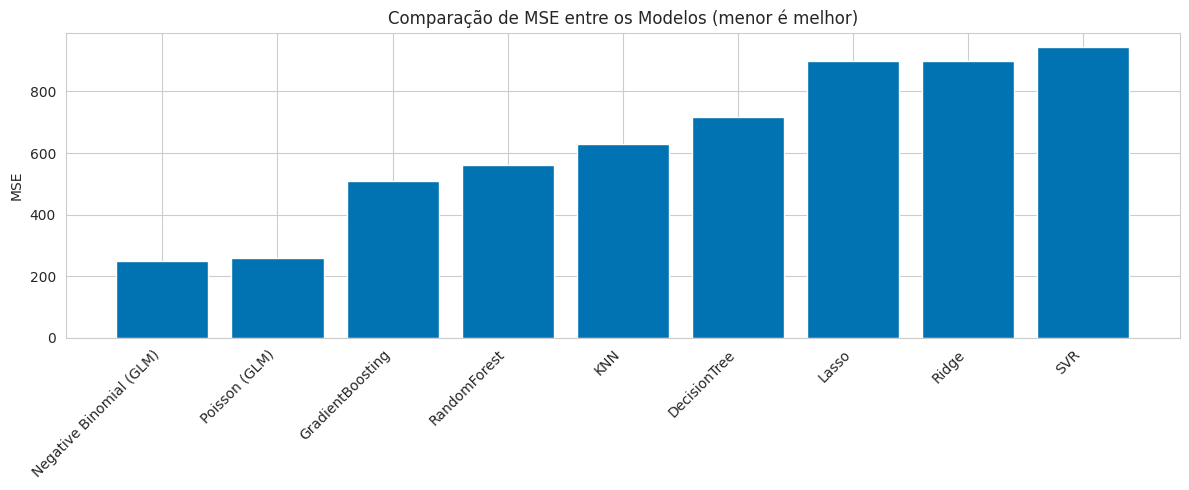

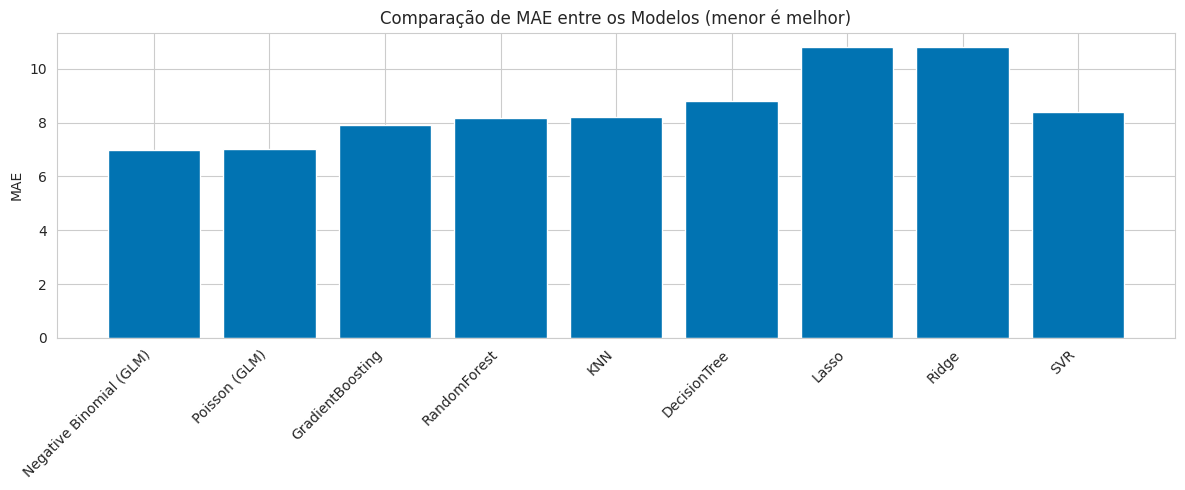

In [28]:
def preparar_matrizes(df, formula):
    alvo, rhs = formula.split("~")
    alvo = alvo.strip()
    variaveis = [v.strip() for v in rhs.split("+")]

    cat_vars = []
    num_vars = []
    for v in variaveis:
        if v.startswith("C("):
            cat_vars.append(v[2:-1])
        else:
            num_vars.append(v)

    X_num = df[num_vars]
    X_cat = pd.get_dummies(df[cat_vars], drop_first=True)

    X = pd.concat([X_num, X_cat], axis=1)
    y = df[alvo]

    return y, X

def comparar_modelos(df, formula, alpha_nb=0.23, test_size=0.20, random_state=42):

    # Separação treino e teste
    train, test = train_test_split(df, test_size=test_size, random_state=random_state)

    # Preparação das matrizes
    y_train, X_train = preparar_matrizes(train, formula)
    y_test, X_test = preparar_matrizes(test, formula)
    X_train, X_test = X_train.align(X_test, join="outer", axis=1, fill_value=0)

    # Para GLM, intercepto explícito
    X_train_glm = sm.add_constant(X_train)
    X_test_glm = sm.add_constant(X_test)

    resultados = []
    glm_objetos = {}

    # ---------------- GLM Poisson -----------------
    glm_poisson = sm.GLM(
        y_train, 
        X_train_glm, 
        family=sm.families.Poisson()
    ).fit()
    
    pred_pois = glm_poisson.predict(X_test_glm)
    resultados.append([
        "Poisson (GLM)",
        mean_squared_error(y_test, pred_pois),
        mean_absolute_error(y_test, pred_pois),
        glm_poisson.aic,
        glm_poisson.bic
    ])
    glm_objetos["Poisson (GLM)"] = glm_poisson

    # ---------------- GLM Negative Binomial -----------------
    glm_nb = sm.GLM(
        y_train, 
        X_train_glm, 
        family=sm.families.NegativeBinomial(alpha=alpha_nb)
    ).fit()
    
    pred_nb = glm_nb.predict(X_test_glm)
    resultados.append([
        "Negative Binomial (GLM)",
        mean_squared_error(y_test, pred_nb),
        mean_absolute_error(y_test, pred_nb),
        glm_nb.aic,
        glm_nb.bic
    ])  
    glm_objetos["Negative Binomial (GLM)"] = glm_nb

    # ---------------- Modelos de Machine Learning -----------------
    modelos_com_grid = {
        "Ridge": (Ridge(), {"ridge__alpha": [0.1, 1.0, 10.0, 100.0]}),
        "Lasso": (Lasso(max_iter=10000), {"lasso__alpha": [0.01, 0.1, 1.0, 10.0]}),
        "SVR": (SVR(), {"svr__C": [0.1, 1, 10], "svr__epsilon": [0.01, 0.1, 1]}),
        "KNN": (KNeighborsRegressor(), {"knn__n_neighbors": [3, 5, 7, 11]}),
        "RandomForest": (RandomForestRegressor(random_state=random_state),
                         {"randomforest__n_estimators": [100, 200],
                          "randomforest__max_depth": [None, 5, 10]}),
        "GradientBoosting": (GradientBoostingRegressor(random_state=random_state),
                             {"gradientboosting__n_estimators": [100, 200],
                              "gradientboosting__learning_rate": [0.01, 0.05, 0.1]}),
        "DecisionTree": (DecisionTreeRegressor(random_state=random_state),
                         {"decisiontree__max_depth": [3, 5, 10, None]})
    }

    kf = KFold(n_splits=5, shuffle=True, random_state=random_state)
    mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

    for nome, (modelo, grid) in modelos_com_grid.items():
        pipeline = Pipeline([('scaler', StandardScaler()), (nome.lower(), modelo)])
        gs = GridSearchCV(estimator=pipeline, param_grid=grid, scoring=mse_scorer,
                          cv=kf, n_jobs=-1)
        gs.fit(X_train, y_train)
        melhor_modelo = gs.best_estimator_
        pred = melhor_modelo.predict(X_test)
        resultados.append([
            nome,
            mean_squared_error(y_test, pred),
            mean_absolute_error(y_test, pred),
            None,
            None
        ])

    df_result = pd.DataFrame(resultados, columns=["Modelo", "MSE", "MAE", "AIC", "BIC"])
    df_result = df_result.sort_values("MSE").reset_index(drop=True)

    print("=== RANKING FINAL DOS MODELOS (POR MSE) ===")
    print(df_result)

    print("\n=== MELHOR MODELO ===")
    melhor_linha = df_result.iloc[0]
    print(melhor_linha)
    df_glm = df_result[df_result["Modelo"].isin(["Poisson (GLM)", "Negative Binomial (GLM)"])]
    melhor_glm_nome = df_glm.sort_values("MSE").iloc[0]["Modelo"]

    print("\n=== MELHOR MODELO ENTRE OS GLMs ===")
    print(df_glm.sort_values("MSE").iloc[0])
    melhor_glm_objeto = glm_objetos[melhor_glm_nome]

    return melhor_glm_objeto, df_result

# Execução da comparação dos modelos
melhor_modelo, tabela = comparar_modelos(df, formula)


# Plotagem dos gráficos para comparação

# MSE
plt.figure(figsize=(12, 5))
plt.bar(tabela["Modelo"], tabela["MSE"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("MSE")
plt.title("Comparação de MSE entre os Modelos (menor é melhor)")
plt.tight_layout()
plt.show()

# MAE
plt.figure(figsize=(12, 5))
plt.bar(tabela["Modelo"], tabela["MAE"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("MAE")
plt.title("Comparação de MAE entre os Modelos (menor é melhor)")
plt.tight_layout()
plt.show()


**1. Desempenho Preditivo (Treino 80% / Teste 20%)**

* **Melhor Modelo**: o modelo **Binomial Negativo** obteve o melhor desempenho global (Menor EQM: 250.47 | Menor EAM: 6.99), errando, em média, cerca de 7 espirros. Além disso, é interessante notar que o modelo Poisson ficou em segundo lugar, praticamente empatado no erro absoluto (EAM: 7.02), demonstrando alta competência na previsão pontual da média.

* **Machine Learning**: modelos complexos, tais como Gradient Boosting, Random Forest e outros, tiveram desempenhos inferiores, indicando que a estrutura dos GLMs é mais adequada para este problema.

**2. Consistência: AIC vs. EQM**

* **Concordância**: ambos os critérios (ajuste e predição) elegem a Binomial Negativa como o melhor modelo.

* **Nuance na Magnitude**: o AIC mostrou uma diferença significativa entre os modelos (punindo severamente a Poisson pela falha em modelar a superdispersão), enquanto o EQM mostrou uma diferença pequena (pois a Poisson estima a média corretamente, apesar de errar na variância).

Assim, para estimar apenas a média de espirros, ambos os GLMs são úteis. No entanto, para uma inferência estatística completa e correta, a **Binomial Negativa** é superior.

### **7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis: Indivíduo A (alcohol = 0, antihist = 1, smoker = 0, age = 30 anos, pollen = valor correspondente a um dia de baixa concentração) e Indivíduo B (alcohol = 1, antihist = 0, smoker = 1, age = 50 anos, pollen = valor correspondente a um dia de alta concentração).

In [29]:
# Definições

# Polen alto e baixo
pollen_baixo = df["pollen"].quantile(0.05)
pollen_alto  = df["pollen"].quantile(0.95)

# Individuos
novos = pd.DataFrame([
    {
        "alcohol": 0, 
        "antihist": 1, 
        "smoker": 0, 
        "age": 30, 
        "pollen": pollen_baixo
    },
    {
        "alcohol": 1, 
        "antihist": 0, 
        "smoker": 1, 
        "age": 50, 
        "pollen": pollen_alto
    }
])

In [30]:
# Ajustar dados para equivalerem aos de treino/teste
novos = pd.get_dummies(novos, drop_first=True)

# Recuperar colunas usadas no GLM
cols_modelo = melhor_modelo.model.exog_names.copy()

# Retirar intercepto calculado
cols_modelo.remove("const")   

# Alinhar colunas e preencher faltantes
novos = novos.reindex(columns=cols_modelo, fill_value=0)

# Recolocar o intercepto
novos = sm.add_constant(novos, has_constant='add')

In [31]:
# Realizar a previsão
pred = melhor_modelo.predict(novos)

resultado = pd.DataFrame({
    "Indivíduo": ["A", "B"],
    "Espirros Esperados": pred
})
resultado


,Indivíduo,Espirros Esperados
0,A,2.69
1,B,87.69


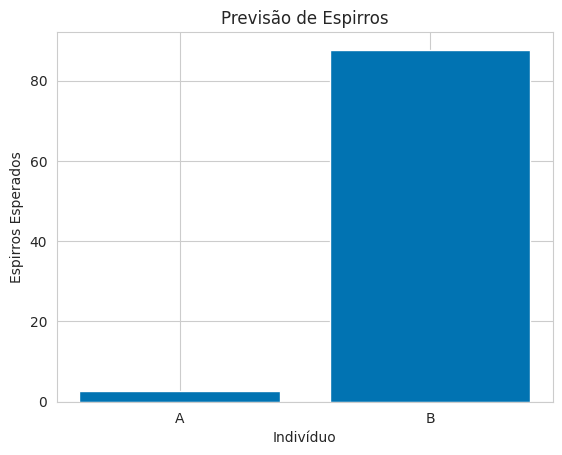

In [32]:
# Plotar gráfico
plt.bar(resultado["Indivíduo"], resultado["Espirros Esperados"])
plt.xlabel("Indivíduo")
plt.ylabel("Espirros Esperados")
plt.title("Previsão de Espirros")
plt.show()

Com base no modelo **Binomial Negativo** selecionado, os valores esperados (médios) de espirros para cada cenário:

**1. Indivíduo A: "Perfil Protegido"**:
* **Características:** Não bebe, não fuma, usa anti-histamínico, 30 anos, exposição a pouco pólen.
* **Previsão:** Aproximadamente **3 espirros**.
* **Interpretação:** Este cenário representa o controle ideal. A combinação de baixa exposição ao alérgeno (pólen) com a proteção medicamentosa (`antihist=1`) e ausência de agravantes comportamentais mantém os sintomas em um nível basal, praticamente imperceptível no dia a dia.

**2. Indivíduo B: "Perfil de Risco"**:
* **Características:** Bebe, fuma, sem medicação, 50 anos, exposição a muito pólen.
* **Previsão:** Aproximadamente **88 espirros**.
* **Interpretação:** Este cenário representa uma crise aguda. Apesar de o Indivíduo B ser mais velho, esse fator protetor é completamente anulado pela "tempestade perfeita" de riscos. A soma da alta carga de pólen com os agravantes inflamatórios (álcool e tabaco), associado à falta de bloqueio químico (ausência de anti-histamínico), resulta em uma frequência de sintomas quase **30 vezes superior** ao Indivíduo A.


**Conclusão**: 

A comparação entre A e B valida a eficácia prática do modelo, pois consegue capturar como a interação entre fatores ambientais e comportamentais pode ser reproduzida na forma de incômodo leve (poucos espirros) na forma de evento de saúde significativo (espirros patológicos).